# RDF Shapes Network Analysis

This notebook demonstrates the use of the `rdfsolve.shapes_graph` module to parse RDF-config YAML models and generate schema graphs.

## Overview

The shapes_graph module provides functionality to:
- Parse RDF-config YAML models following Ruby RDFConfig library logic
- Handle blank nodes and URI resolution
- Generate combined schema graphs from multiple sources
- Export results in various formats

In [22]:
# Import required libraries
import os
import sys
import yaml
from pathlib import Path

import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Add the src directory to Python path to import our package
project_root = Path.cwd().parent
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

# Import our shapes_graph module
from rdfsolve.shapes_graph import (
    RDFConfigParser, 
    process_multiple_sources,
)

print("Successfully imported rdfsolve.shapes_graph module!")
print(f"Project root: {project_root}")
print(f"Current working directory: {Path.cwd()}")

Successfully imported rdfsolve.shapes_graph module!
Project root: /home/javi/rdfsolve-1
Current working directory: /home/javi/rdfsolve-1/notebooks


## Using a Single RDFConfigParser

First, let's demonstrate how to use the `RDFConfigParser` class to parse a single RDF-config source.

In [23]:
# Example 1: Parse a single config source
config_dir = project_root / "notebooks" / "config" / "uniprot"

# Check if the config directory exists
if config_dir.exists():
    print(f"Processing config directory: {config_dir}")
    
    # Create parser instance
    parser = RDFConfigParser(str(config_dir))
    
    # Load prefixes
    prefixes = parser.load_prefixes()
    print(f"Found {len(prefixes)} prefixes")
    for prefix, uri in list(prefixes.items())[:5]:  # Show first 5
        print(f"  {prefix}: {uri}")
    
    # Parse model to schema
    schema = parser.parse_to_schema()
    print(f"\nGenerated schema with {len(schema)} subject classes")
    print(f"Blank nodes generated: {parser.blank_node_counter}")
    
    # Display sample schema structure
    for i, (subject, properties) in enumerate(list(schema.items())[:2]):
        print(f"\nSubject {i+1}: {subject}")
        for prop, objects in list(properties.items())[:3]:
            print(f"  Property: {prop}")
            for obj in objects[:2]:
                print(f"    → {obj}")
else:
    print(f"Config directory not found: {config_dir}")
    print("Available config directories:")
    config_base = project_root / "notebooks" / "config"
    if config_base.exists():
        for item in config_base.iterdir():
            if item.is_dir():
                print(f"  - {item.name}")

Processing config directory: /home/javi/rdfsolve-1/notebooks/config/uniprot
Found 24 prefixes
  rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
  rdfs: <http://www.w3.org/2000/01/rdf-schema#>
  owl: <http://www.w3.org/2002/07/owl#>
  xsd: <http://www.w3.org/2001/XMLSchema#>
  dct: <http://purl.org/dc/terms/>

Generated schema with 205 subject classes
Blank nodes generated: 106

Subject 1: <http://purl.uniprot.org/core/Protein>
  Property: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
    → <http://purl.uniprot.org/core/Protein>
  Property: <http://purl.uniprot.org/core/recommendedName>
    → <http://purl.uniprot.org/core/Structured_Name>
  Property: <http://purl.uniprot.org/core/submittedName>
    → <http://purl.uniprot.org/core/Structured_Name>

Subject 2: <http://purl.uniprot.org/core/Structured_Name>
  Property: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
    → <http://purl.uniprot.org/core/Structured_Name>
  Property: <http://purl.uniprot.org/core/fullName>
  Property:

## Processing Multiple Sources

Now let's use the `process_multiple_sources` function to process multiple RDF-config sources at once and generate a combined schema graph.

In [24]:
# Example 2: Process multiple sources
config_base_dir = project_root / "notebooks" / "config"

# Get available config directories
available_configs = []
if config_base_dir.exists():
    available_configs = [
        item.name for item in config_base_dir.iterdir() 
        if item.is_dir() and (item / "model.yaml").exists()
    ]

print(f"Available config sources: {available_configs}")

# Select for processing
selected_configs = available_configs if len(available_configs) > 4 else available_configs
print(f"Processing configs: {selected_configs}")

if selected_configs:
    # Process multiple sources
    schema_data = process_multiple_sources(
        config_dirs=selected_configs,
        config_base_dir=str(config_base_dir),
        output_dir=str(Path.cwd()),  # Save to current notebook directory
        remove_qualifiers=True,
        verbose=True
    )
    
    print(f"\n{'='*50}")
    print("Processing complete!")
    print(f"Combined schema contains {len(schema_data['combined'])} subject classes")
else:
    print("No valid config directories found for processing.")

Available config sources: ['vg', 'chip-atlas', 'go', 'dbcatalog', 'hgnc', 'ncbigene', 'wurcs', 'nbrc', 'reactome', 'knapsack', 'bgee', 'expressionatlas', 'dbnsfp', 'ensembl', 'pubcasefinder', 'nextprot', 'nadd', 'ncgm', 'glycosmos', 'uniprot', 'mediadive', 'civic', 'pubchem', 'dgidb', 'imethyl', 'sra_experiment', 'opentggates', 'dbscsnv', 'mp', 'chembl', 'mesh', 'uberon', 'mbgd', 'fanta_bio', 'kero', 'biosample', 'ggdonto', 'bacdive', 'quanto', 'pdb', 'nando', 'ssbd', 'naro_genebank', 'pgdbj', 'glycoepitope', 'homologene', 'gtdb', 'interview-form', 'gwascatalog', 'clinvar', 'instruct', 'oma', 'jcm', 'jpostdb', 'famsbase', 'chebi', 'pubmed', 'hpo', 'brenda', 'polyinfo', 'nikkaji', 'refex', 'paconto', 'mondo', 'exac', 'nlm-catalog', 'hco', 'dbsnp', 'togoid', 'hint', 'medgen', 'ncit', 'glytoucan', 'togovar', 'dbvar', 'test', 'rhea', 'linked_icgc', 'hop', 'ddbj']
Processing configs: ['vg', 'chip-atlas', 'go', 'dbcatalog', 'hgnc', 'ncbigene', 'wurcs', 'nbrc', 'reactome', 'knapsack', 'bgee',

## Visualizing Schema Networks


In [25]:
# Create directed graph
G = nx.DiGraph()

# Add nodes and edges from schema
i = 0
for subject_uri, properties in schema.items():
    # Add subject node
    G.add_node(subject_uri, node_type="class")

    for property_uri, object_uris in properties.items():
        for object_uri in object_uris:
            # Skip blank nodes
            # if object_uri.startswith('_:'):
            #    continue

            # Add object node
            G.add_node(object_uri, node_type="class")
            i +=1

            # Add edge with property as attribute
            if subject_uri != object_uri:
                G.add_edge(subject_uri, object_uri, property=property_uri)
print(i)
print(f"Graph Statistics:")
print(f"  Nodes (classes): {G.number_of_nodes()}")
print(f"  Edges (properties): {G.number_of_edges()}")
print(f"  Density: {nx.density(G):.4f}")
print(f"  Is directed: {G.is_directed()}")

528
Graph Statistics:
  Nodes (classes): 254
  Edges (properties): 426
  Density: 0.0066
  Is directed: True


In [26]:
# Find most connected classes (by in-degree and out-degree)
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Top classes by incoming connections (most referenced)
print("Top 10 most referenced classes (in-degree):")
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
for uri, degree in top_in:
    # Shorten URI for display
    short_uri = uri.split("/")[-1].rstrip(">")
    print(f"  {short_uri}: {degree}")

print("\nTop 10 most referencing classes (out-degree):")
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
for uri, degree in top_out:
    short_uri = uri.split("/")[-1].rstrip(">")
    print(f"  {short_uri}: {degree}")

Top 10 most referenced classes (in-degree):
  faldo#Position: 69
  faldo#Region: 34
  External_Sequence: 8
  Electronic_Citation: 7
  14504186: 7
  Journal_Citation: 6
  Submission_Citation: 6
  Thesis_Citation: 6
  Observation_Citation: 6
  Patent_Citation: 6

Top 10 most referencing classes (out-degree):
  Protein: 92
  External_Sequence: 7
  Electronic_Citation: 7
  Journal_Citation: 7
  Submission_Citation: 7
  Thesis_Citation: 7
  Observation_Citation: 7
  Patent_Citation: 7
  Book_Citation: 7
  Structure_Resource: 4


In [27]:
# Count property usage
property_counts = defaultdict(int)
for u, v, data in G.edges(data=True):
    prop = data.get("property", "unknown")
    property_counts[prop] += 1

print("Top 10 most used properties:")
top_props = sorted(property_counts.items(), key=lambda x: x[1], reverse=True)[:10]
for prop, count in top_props:
    # Shorten property URI
    short_prop = prop.split("/")[-1].rstrip(">")
    print(f"  {short_prop}: {count}")

Top 10 most used properties:
  22-rdf-syntax-ns#type: 165
  annotation: 74
  range: 34
  faldo#begin: 34
  faldo#end: 34
  sequence: 25
  translatedFrom: 7
  primaryTopicOf: 7
  conflictingSequence: 7
  database: 4


=== Example 1: Most Connected Node ===
Selected node (most connected (degree: 92)): <http://purl.uniprot.org/core/Protein>
Ego graph: 93 nodes, 100 edges


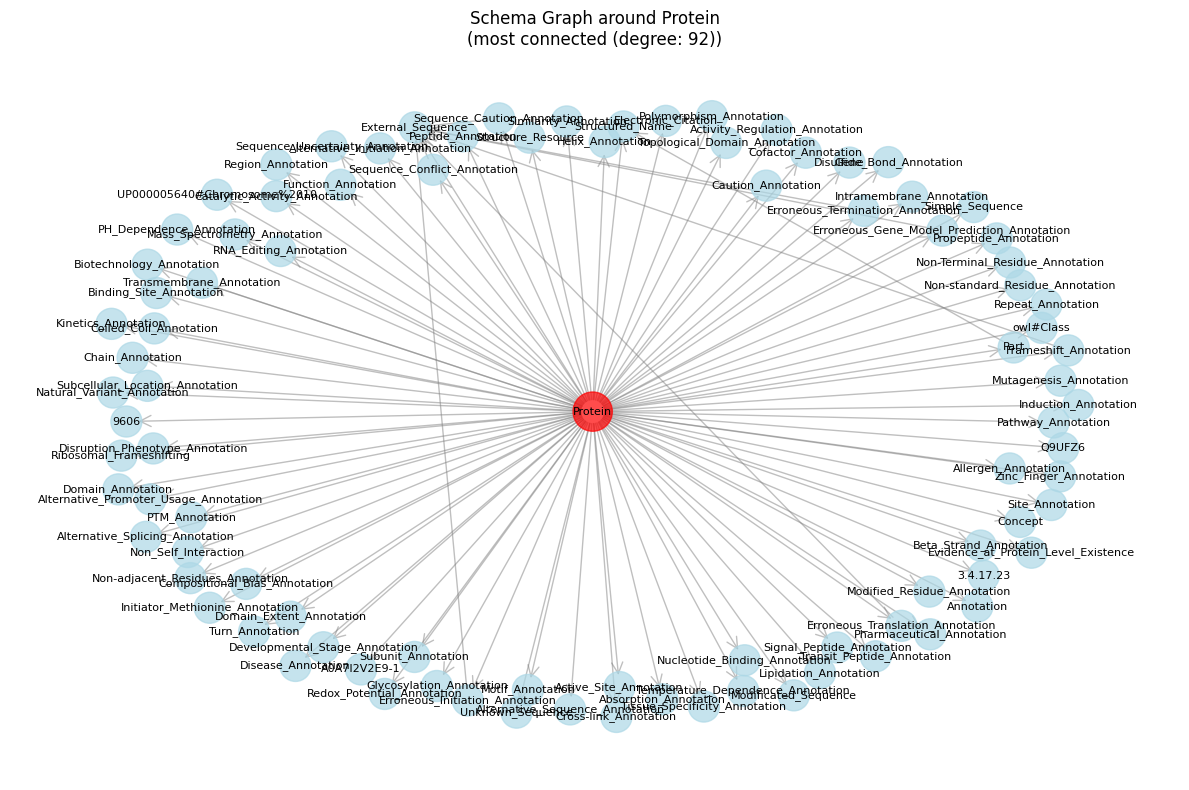


=== Example 2: Node at 80th Percentile ===
Selected node (at 80th percentile (degree: 1)): <http://purl.uniprot.org/core/Concept>
Ego graph: 1 nodes, 0 edges


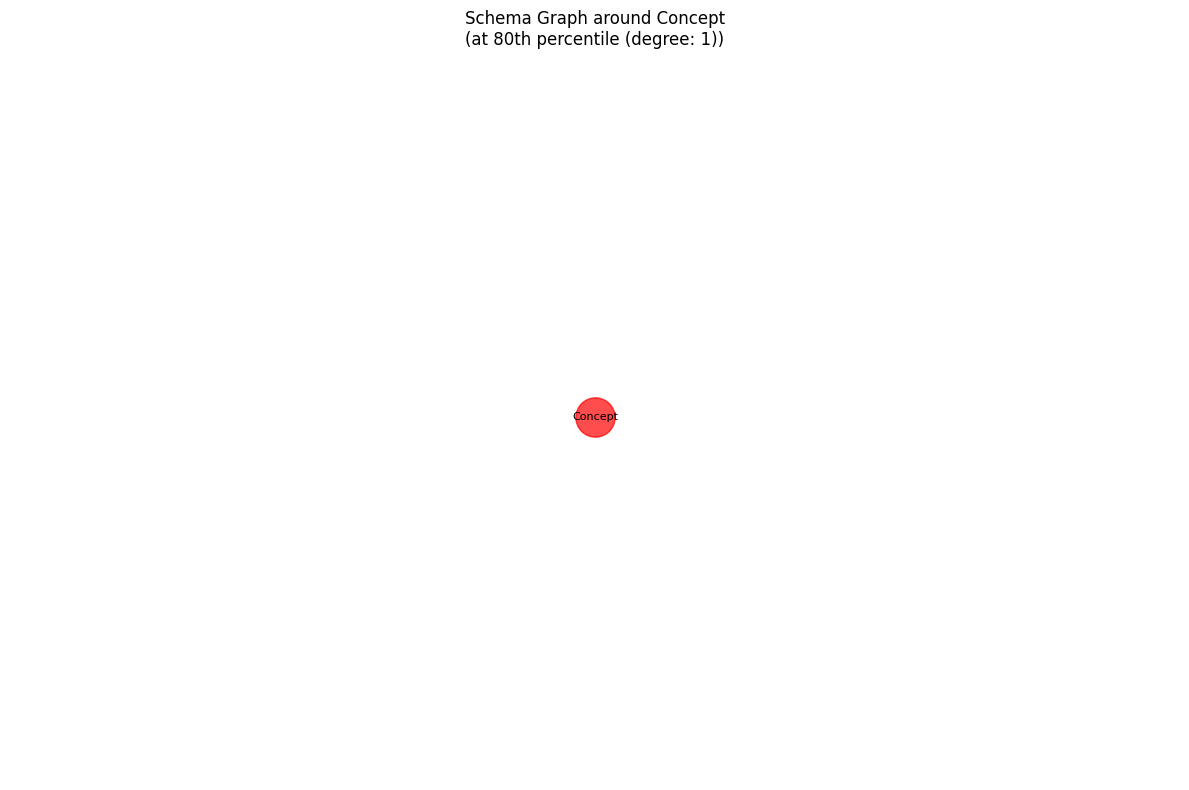


=== Example 3: Node 10 Positions from Max ===
Selected node (10 positions from max (degree: 13)): <http://purl.uniprot.org/core/Book_Citation>
Ego graph: 8 nodes, 49 edges


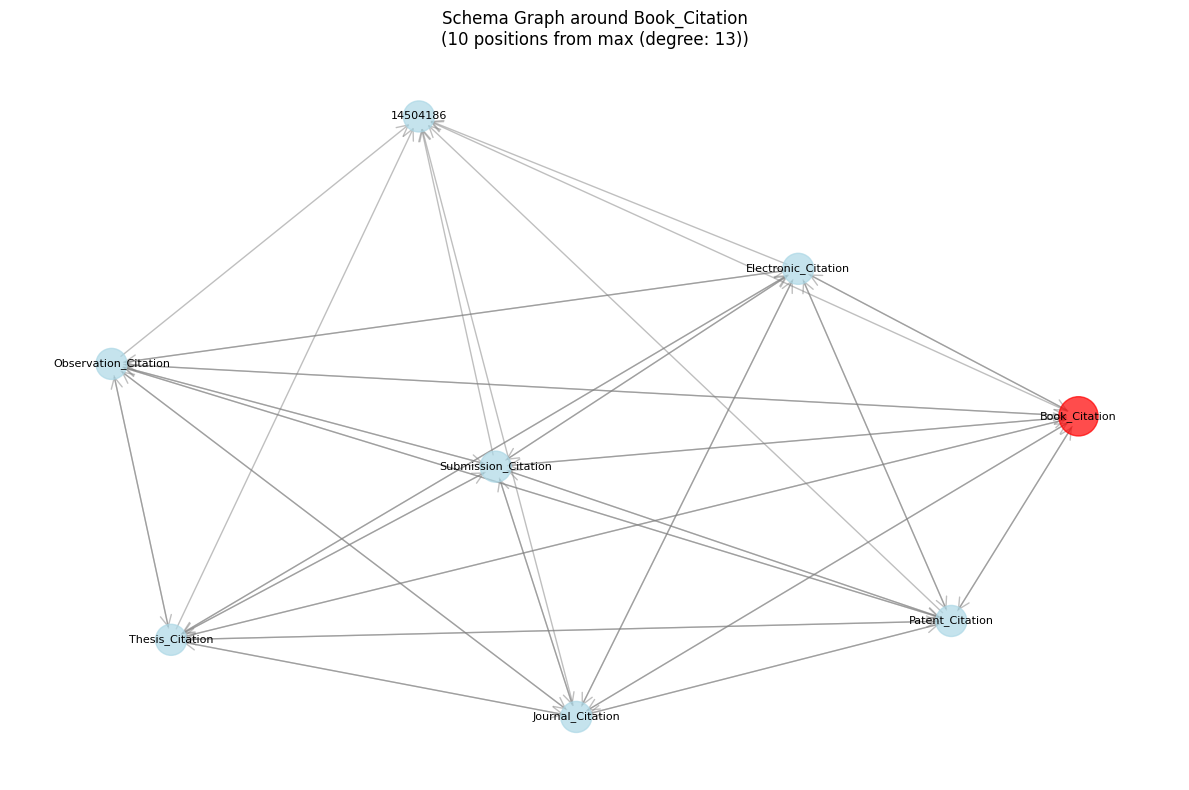


=== Example 4: Least Connected Node ===
Selected node (least connected (degree: 1)): <http://purl.uniprot.org/uniprot/Q9H2X3>
Ego graph: 1 nodes, 0 edges


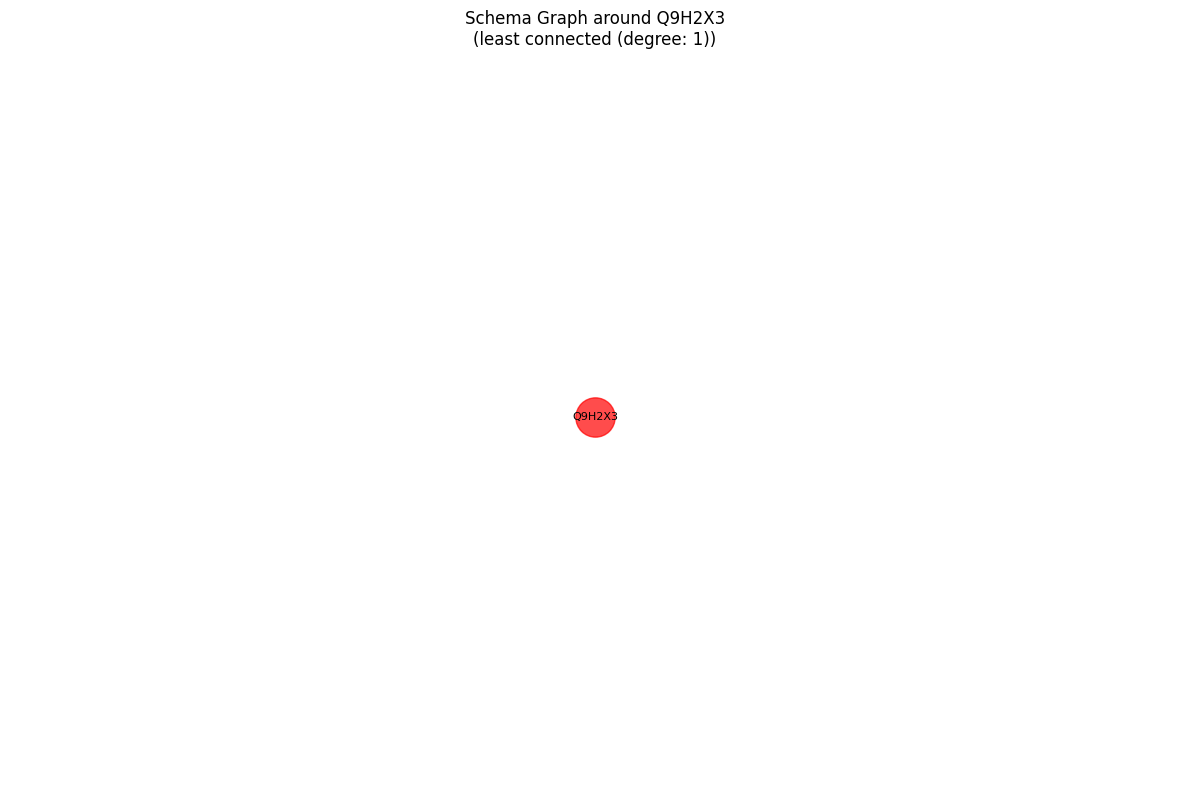

In [28]:
def visualize_node_by_connectivity(
    graph,
    in_degrees,
    out_degrees,
    selection_mode="max",
    percentile=None,
    distance_from_extreme=None,
    extreme_type="max",
    radius=1,
    figsize=(12, 8),
):
    """
    Visualize an ego graph around a node selected by connectivity criteria.

    Parameters:
    -----------
    graph : networkx.DiGraph
        The graph to visualize
    in_degrees : dict
        Dictionary of in-degrees for all nodes
    out_degrees : dict
        Dictionary of out-degrees for all nodes
    selection_mode : str
        How to select the node:
        - 'max': most connected node (default)
        - 'min': least connected node
        - 'percentile': node at specific percentile of connectivity
        - 'distance_from_max': node at specific distance from max connectivity
        - 'distance_from_min': node at specific distance from min connectivity
    percentile : float
        Percentile value (0-100) when selection_mode='percentile'
    distance_from_extreme : int
        Number of positions from extreme when using distance-based selection
    extreme_type : str
        'max' or 'min' - used with distance_from_extreme
    radius : int
        Radius of ego graph (default: 1)
    figsize : tuple
        Figure size (default: (12, 8))

    Returns:
    --------
    tuple : (selected_node, ego_graph)
    """
    # Calculate total degree for each node
    total_degrees = {
        node: in_degrees[node] + out_degrees[node] for node in graph.nodes()
    }

    # Sort nodes by total degree
    sorted_nodes = sorted(total_degrees.items(), key=lambda x: x[1], reverse=True)

    # Select node based on mode
    if selection_mode == "max":
        selected_node = sorted_nodes[0][0]
        selection_info = f"most connected (degree: {sorted_nodes[0][1]})"

    elif selection_mode == "min":
        selected_node = sorted_nodes[-1][0]
        selection_info = f"least connected (degree: {sorted_nodes[-1][1]})"

    elif selection_mode == "percentile":
        if percentile is None:
            raise ValueError(
                "percentile must be specified when selection_mode='percentile'"
            )
        if not 0 <= percentile <= 100:
            raise ValueError("percentile must be between 0 and 100")

        index = int(len(sorted_nodes) * percentile / 100)
        index = min(index, len(sorted_nodes) - 1)
        selected_node = sorted_nodes[index][0]
        selection_info = (
            f"at {percentile}th percentile (degree: {sorted_nodes[index][1]})"
        )

    elif selection_mode == "distance_from_max":
        if distance_from_extreme is None:
            raise ValueError("distance_from_extreme must be specified")

        index = min(distance_from_extreme, len(sorted_nodes) - 1)
        selected_node = sorted_nodes[index][0]
        selection_info = f"{distance_from_extreme} positions from max (degree: {sorted_nodes[index][1]})"

    elif selection_mode == "distance_from_min":
        if distance_from_extreme is None:
            raise ValueError("distance_from_extreme must be specified")

        index = max(len(sorted_nodes) - 1 - distance_from_extreme, 0)
        selected_node = sorted_nodes[index][0]
        selection_info = f"{distance_from_extreme} positions from min (degree: {sorted_nodes[index][1]})"

    else:
        raise ValueError(f"Unknown selection_mode: {selection_mode}")

    print(f"Selected node ({selection_info}): {selected_node}")

    # Extract ego graph
    ego_graph = nx.ego_graph(graph, selected_node, radius=radius)
    print(
        f"Ego graph: {ego_graph.number_of_nodes()} nodes, {ego_graph.number_of_edges()} edges"
    )

    # Visualize
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(ego_graph, k=2, iterations=50)

    # Highlight the selected node differently
    node_colors = [
        "red" if node == selected_node else "lightblue" for node in ego_graph.nodes()
    ]
    node_sizes = [800 if node == selected_node else 500 for node in ego_graph.nodes()]

    # Draw nodes
    nx.draw_networkx_nodes(
        ego_graph, pos, node_color=node_colors, node_size=node_sizes, alpha=0.7
    )

    # Draw edges with arrows
    nx.draw_networkx_edges(
        ego_graph,
        pos,
        edge_color="gray",
        arrows=True,
        arrowsize=20,
        arrowstyle="->",
        alpha=0.5,
    )

    # Draw labels (shortened)
    labels = {node: node.split("/")[-1].rstrip(">") for node in ego_graph.nodes()}
    nx.draw_networkx_labels(ego_graph, pos, labels, font_size=8)

    short_name = selected_node.split("/")[-1].rstrip(">")
    plt.title(f"Schema Graph around {short_name}\n({selection_info})")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    return selected_node, ego_graph


# Example 1: Most connected node (default)
print("=== Example 1: Most Connected Node ===")
node1, ego1 = visualize_node_by_connectivity(G, in_degrees, out_degrees)

print("\n=== Example 2: Node at 80th Percentile ===")
node2, ego2 = visualize_node_by_connectivity(
    G, in_degrees, out_degrees, selection_mode="percentile", percentile=80
)

print("\n=== Example 3: Node 10 Positions from Max ===")
node3, ego3 = visualize_node_by_connectivity(
    G,
    in_degrees,
    out_degrees,
    selection_mode="distance_from_max",
    distance_from_extreme=10,
)

print("\n=== Example 4: Least Connected Node ===")
node4, ego4 = visualize_node_by_connectivity(
    G, in_degrees, out_degrees, selection_mode="min"
)